# Import Module

In [ ]:
!pip install gdown

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
import gdown
import random
import time

from datetime import datetime

from collections import Counter

from sklearn.base import clone
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, precision_score, recall_score, accuracy_score, make_scorer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import PolynomialFeatures

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

# Read Data

In [ ]:
TRAIN_ID = '1OoSL2xy3gb2oPDRx102-FUAkbVGUWXhq'
TRAIN_URL = f'https://drive.google.com/uc?id={TRAIN_ID}'
TRAIN_FILENAME = "train.csv"
gdown.download(TRAIN_URL, TRAIN_FILENAME, quiet=False)

df_train = pd.read_csv('train.csv')
df_train.head()

Downloading...
From: https://drive.google.com/uc?id=1OoSL2xy3gb2oPDRx102-FUAkbVGUWXhq
To: /content/train.csv
100%|██████████| 1.60M/1.60M [00:00<00:00, 29.1MB/s]


,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,...,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence,Role
0,6,4,4,4,4,4,4,4,4,4,...,0.480564,0.470877,0.039611,0.742567,0.086927,0.339776,0.091158,0.230518,0.208746,Database Administrator
1,6,5,4,4,4,4,4,4,4,4,...,0.452903,0.377581,0.090148,0.672546,0.071425,0.353678,0.104495,0.247432,0.196424,Database Administrator
2,6,1,4,4,4,4,4,4,4,4,...,0.461668,0.347739,0.138575,0.630705,0.095261,0.375125,0.135462,0.287253,0.268024,Database Administrator
3,6,0,4,4,4,4,4,4,4,4,...,0.521783,0.403756,0.114925,0.695280,0.122656,0.338899,0.161705,0.306562,0.258119,Database Administrator
4,6,3,4,4,4,4,4,4,4,4,...,0.319539,0.240337,0.050988,0.619390,0.065564,0.311896,0.147700,0.302978,0.207287,Database Administrator


In [ ]:
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

In [ ]:
check_null(df_train)

Tidak ditemukan missing value pada dataset


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Database Fundamentals            9179 non-null   int64  
 1   Computer Architecture            9179 non-null   int64  
 2   Distributed Computing Systems    9179 non-null   int64  
 3   Cyber Security                   9179 non-null   int64  
 4   Networking                       9179 non-null   int64  
 5   Software Development             9179 non-null   int64  
 6   Programming Skills               9179 non-null   int64  
 7   Project Management               9179 non-null   int64  
 8   Computer Forensics Fundamentals  9179 non-null   int64  
 9   Technical Communication          9179 non-null   int64  
 10  AI ML                            9179 non-null   int64  
 11  Software Engineering             9179 non-null   int64  
 12  Business Analysis   

> 17 technical skills dan 10 soft skills

In [ ]:
df_train.columns

Index(['Database Fundamentals', 'Computer Architecture',
       'Distributed Computing Systems', 'Cyber Security', 'Networking',
       'Software Development', 'Programming Skills', 'Project Management',
       'Computer Forensics Fundamentals', 'Technical Communication', 'AI ML',
       'Software Engineering', 'Business Analysis', 'Communication skills',
       'Data Science', 'Troubleshooting skills', 'Graphics Designing',
       'Openness', 'Conscientousness', 'Extraversion', 'Agreeableness',
       'Emotional_Range', 'Conversation', 'Openness to Change', 'Hedonism',
       'Self-enhancement', 'Self-transcendence', 'Role'],
      dtype='object')

In [ ]:
df_train.describe()

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,...,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence
count,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,...,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000,9179.000000
mean,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,2.705959,...,0.734488,0.438438,0.400094,0.150369,0.616173,0.104990,0.383124,0.164839,0.314053,0.235750
std,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,1.850403,...,0.078523,0.122408,0.142363,0.096312,0.097118,0.063861,0.069740,0.057645,0.062839,0.057746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.563646,0.108561,0.102254,0.017733,0.391125,0.012488,0.147039,0.062674,0.087559,0.059278
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.685635,0.337844,0.283624,0.073822,0.554618,0.054775,0.341044,0.123395,0.274069,0.201112
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,0.727765,0.448789,0.378902,0.116550,0.617598,0.092798,0.382971,0.156598,0.311400,0.233827
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,0.785837,0.522801,0.525272,0.195782,0.672837,0.129722,0.430398,0.189111,0.353478,0.274723
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,0.900797,0.734466,0.745477,0.538450,0.889522,0.390480,0.655578,0.427479,0.594727,0.508034


In [ ]:
df_train['Role'].unique()

array(['Database Administrator', 'Hardware Engineer',
       'Application Support Engineer', 'Cyber Security Specialist',
       'Networking Engineer', 'Software Developer', 'API Specialist',
       'Project Manager', 'Information Security Specialist',
       'Technical Writer', 'AI ML Specialist', 'Software tester',
       'Business Analyst', 'Customer Service Executive',
       'Helpdesk Engineer', 'Graphics Designer'], dtype=object)

In [ ]:
role_grouped_data = df_train.groupby('Role').mean()

role_grouped_data.head()

# Define technical and non-technical columns
technical_columns = [
        'Database Fundamentals', 'Computer Architecture',
       'Distributed Computing Systems', 'Cyber Security', 'Networking',
       'Software Development', 'Programming Skills', 'Project Management',
       'Computer Forensics Fundamentals', 'Technical Communication', 'AI ML',
       'Software Engineering', 'Business Analysis', 'Communication skills',
       'Data Science', 'Troubleshooting skills', 'Graphics Designing',
]

non_technical_columns = [
    'Openness', 'Conscientousness', 'Extraversion', 'Agreeableness',
       'Emotional_Range', 'Conversation', 'Openness to Change', 'Hedonism',
       'Self-enhancement', 'Self-transcendence',
]

def get_top_skills(grouped_data, columns, top_n=3):
    return grouped_data[columns].apply(lambda x: x.nlargest(top_n).index.tolist(), axis=1)

# Top technical skills for each role
top_technical_skills = get_top_skills(role_grouped_data, technical_columns)

# Top non-technical skills for each role
top_non_technical_skills = get_top_skills(role_grouped_data, non_technical_columns)

# Combine into a single DataFrame
top_skills_summary = pd.DataFrame({
    'Top Technical Skills': top_technical_skills,
    'Top Non-Technical Skills': top_non_technical_skills
})

In [ ]:
top_skills_summary

,Top Technical Skills,Top Non-Technical Skills
Role,,
AI ML Specialist,"[AI ML, Data Science, Database Fundamentals]","[Openness, Emotional_Range, Openness to Change]"
API Specialist,"[Programming Skills, Database Fundamentals, Co...","[Openness, Emotional_Range, Conscientousness]"
Application Support Engineer,"[Distributed Computing Systems, Database Funda...","[Openness, Emotional_Range, Conscientousness]"
Business Analyst,"[Business Analysis, Database Fundamentals, Com...","[Openness, Emotional_Range, Extraversion]"
Customer Service Executive,"[Communication skills, Database Fundamentals, ...","[Emotional_Range, Openness, Extraversion]"
Cyber Security Specialist,"[Cyber Security, Database Fundamentals, Comput...","[Openness, Emotional_Range, Conscientousness]"
Database Administrator,"[Database Fundamentals, Computer Architecture,...","[Openness, Emotional_Range, Conscientousness]"
Graphics Designer,"[Graphics Designing, Database Fundamentals, Co...","[Openness, Emotional_Range, Openness to Change]"
Hardware Engineer,"[Computer Architecture, Database Fundamentals,...","[Openness, Emotional_Range, Conscientousness]"


In [ ]:
# Rename role to a more appropriate role in IT jobl listings
df_train['Role'] = df_train['Role'].replace({
    'Helpdesk Engineer': 'IT Support',
    'Application Support Engineer': 'IT Support',
    'Customer Service Executive': 'IT Support'
})

df_train['Role'] = df_train['Role'].replace({
    'API Specialist': 'Software Engineer',
    'Software Developer': 'Software Engineer'
})

df_train['Role'] = df_train['Role'].replace('Graphics Designer', 'UI/UX Engineer')
df_train['Role'] = df_train['Role'].replace('Software tester', 'Software Tester')
df_train['Role'] = df_train['Role'].replace('AI ML Specialist', 'AI/ML Specialist')

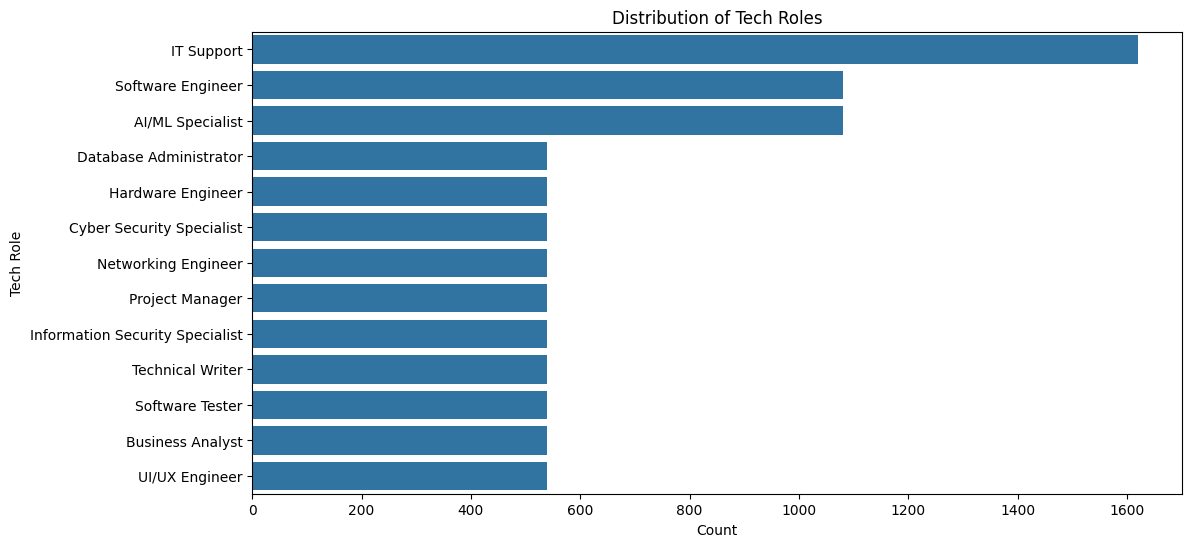

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df_train['Role'], order=df_train['Role'].value_counts().index)
plt.title('Distribution of Tech Roles')
plt.xlabel('Count')
plt.ylabel('Tech Role')
plt.show()

# Data Preprocessing

In [ ]:
# le_role = LabelEncoder()

# df_train['Role'] = le_role.fit_transform(df_train['Role'])

In [ ]:
# correlation_matrix = df_train.corr()
# correlation_with_promotion = correlation_matrix['Role'].sort_values(ascending=False)
# correlation_with_promotion

# Training

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = df_train.drop(["Role"], axis = 1)
y = df_train["Role"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def ml_model(X_train, X_test, y_train, y_test):
  MLA = [
      LogisticRegression(max_iter=5000),
      KNeighborsClassifier(),
      DecisionTreeClassifier(),
      RandomForestClassifier(n_estimators=100, random_state=123),
      GaussianNB(),
      MLPClassifier(alpha=1, max_iter=1000, random_state=42),
      AdaBoostClassifier(random_state=42),
]

  MLA_columns = ['Algorithm', 'Accuracy', 'F1 Macro', 'F1 Micro', 'Precision Macro', 'Precision Micro', 'Recall Macro', 'Recall Micro']
  MLA_compare = pd.DataFrame(columns=MLA_columns)

  row_index = 0
  for alg in MLA:
      alg_name = alg.__class__.__name__
      alg.fit(X_train, y_train)
      prediction = alg.predict(X_test)

      MLA_compare.loc[row_index, 'Algorithm'] = alg_name
      MLA_compare.loc[row_index, 'Accuracy'] = accuracy_score(y_test, prediction)
      MLA_compare.loc[row_index, 'F1 Macro'] = f1_score(y_test, prediction, average='macro')
      MLA_compare.loc[row_index, 'F1 Micro'] = f1_score(y_test, prediction, average='micro')
      MLA_compare.loc[row_index, 'Precision Macro'] = precision_score(y_test, prediction, average='macro', zero_division=0)
      MLA_compare.loc[row_index, 'Precision Micro'] = precision_score(y_test, prediction, average='micro', zero_division=0)
      MLA_compare.loc[row_index, 'Recall Macro'] = recall_score(y_test, prediction, average='macro', zero_division=0)
      MLA_compare.loc[row_index, 'Recall Micro'] = recall_score(y_test, prediction, average='micro', zero_division=0)

      row_index += 1

  display(MLA_compare)

In [ ]:
ml_model(X_train, X_test, y_train, y_test)

,Algorithm,Accuracy,F1 Macro,F1 Micro,Precision Macro,Precision Micro,Recall Macro,Recall Micro
0,LogisticRegression,0.988562,0.992505,0.988562,0.992925,0.988562,0.9921,0.988562
1,KNeighborsClassifier,0.925381,0.926149,0.925381,0.936662,0.925381,0.919343,0.925381
2,DecisionTreeClassifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,RandomForestClassifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,GaussianNB,0.915033,0.954286,0.915033,0.960129,0.915033,0.955768,0.915033
5,MLPClassifier,0.979847,0.984253,0.979847,0.987348,0.979847,0.98148,0.979847
6,AdaBoostClassifier,0.405773,0.337281,0.405773,0.32601,0.405773,0.384615,0.405773


In [ ]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [ ]:
new_sample = np.array([
     5,     3,    2,    1,   1,
     4,     6,    4,    1,   2,
     6,     4,    2,    2,   6,
     1,     0, 0.62, 0.56, 0.5,
  0.44,  0.62,  0.5,  0.5, 0.4,
   0.5, 0.625
]).reshape(1, -1)

new_sample_scaled = scaler.transform(new_sample)

new_pred = rf_model.predict(new_sample_scaled)
# predicted_role_new = le_role.inverse_transform(new_pred)
print(f"Predicted Role for the new sample: {new_pred}")

Predicted Role for the new sample: ['AI/ML Specialist']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
from pickle import dump

pickle.dump(rf_model, open('model.pkl', 'wb'))
dump(scaler, open('scaler.pkl', 'wb'))

In [ ]:
import sklearn
print(sklearn.__version__)


1.3.2
